<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<h2 align=center>STORES ANALYSIS</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 2: Univariate & Multivariate Analysis: STORES

In [2]:
df = pd.read_csv('../DataCoSupplyChainDataset.csv',encoding= 'unicode_escape')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [5]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

To analize each store and it's realtionship with the other variables we need to create a unique identification of the store.

The ID will be based on a State + Street identification.

*Customer State: State to which the store where the purchase is registered belongs

*Customer Street: Street to which the store where the purchase is registered belongs

In [6]:
# Create a dictionary with an Id for the combination of state and street.
k = 0
store_id = {}
for i in range(len(df)):
    store_pos = [df['Customer State'].iloc[i],df['Customer City'].iloc[i],df['Customer Street'].iloc[i]]
    store_str = str(store_pos)
    if store_str not in store_id.keys():
        store_id[store_str] = k
        k = k+1

# Check if the dictionary is created correctly
for i in store_id.items():
    print(i)
    break

("['PR', 'Caguas', '5365 Noble Nectar Island']", 0)


In [7]:
# Add a column of "Store_id" in the DF with the Id created on the previous dictionary (combination of state and street)
# at[]: Access a single value for a row/column label pair. Use to modify the cell value. 
df['Store_id'] = 0 
for i in range(len(df)):
    store_pos = [df['Customer State'].iloc[i],df['Customer City'].iloc[i],df['Customer Street'].iloc[i]]
    store_str = str(store_pos)
    df.at[i,'Store_id'] = store_id[store_str]
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Store_id
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,2
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,3
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,4


### a) STORES

##### How many stores does the company have?

In [8]:
df['Store_id'].nunique()

12010

##### How many stores does the company have by country?

In [9]:
df_numstores = df.groupby(['Customer Country']).nunique()['Store_id']
df_numstores

Customer Country
EE. UU.        7967
Puerto Rico    4043
Name: Store_id, dtype: int64

Text(0.5, 1.0, 'Number of stores per country')

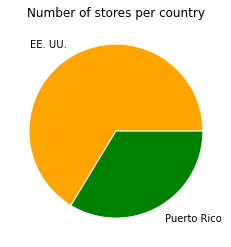

In [10]:
plt.pie(df_numstores, labels=df_numstores.index, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors= ('orange','green'))
plt.title('Number of stores per country')

##### In which state does the company have more stores? (Show the top 10)

In [11]:
df_statestore = df.groupby(['Customer State']).nunique()['Store_id'].sort_values(ascending=False).to_frame().head(10)
df_statestore.columns = df_statestore.columns.str.replace('Store_id','Number of stores') 
df_statestore

,Number of stores
Customer State,
PR,4043
CA,2085
NY,799
TX,667
IL,528
FL,389
OH,284
PA,272
MI,267


Text(0.5, 1.0, 'Top 10 states with more stores (Globally)')

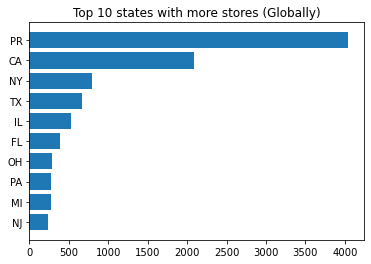

In [12]:
df_statestore = df_statestore.sort_values(by='Number of stores')
plt.barh(y=df_statestore.index, width=df_statestore['Number of stores'])
plt.title('Top 10 states with more stores (Globally)')

### b) DEPARTMENTS

##### How many departments are there?

In [13]:
df['Department Id'].nunique()

11

##### What are the names of the departments?

In [14]:
df[['Department Id','Department Name']].drop_duplicates().set_index('Department Id').sort_values(by='Department Id')

,Department Name
Department Id,
2,Fitness
3,Footwear
4,Apparel
5,Golf
6,Outdoors
7,Fan Shop
8,Book Shop
9,Discs Shop
10,Technology


##### Which are the main departments?

In [15]:
df_depart = df['Department Name'].value_counts().to_frame()
df_depart

,Department Name
Fan Shop,66861
Apparel,48998
Golf,33220
Footwear,14525
Outdoors,9686
Fitness,2479
Discs Shop,2026
Technology,1465
Pet Shop,492
Book Shop,405


Text(0.5, 1.0, 'Top 10 departments with more orders')

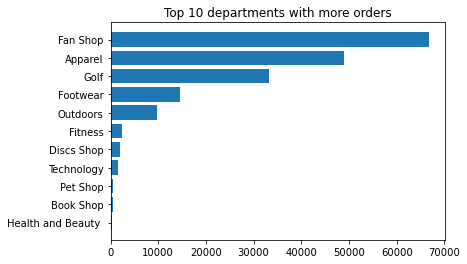

In [16]:
df_departinv = df_depart.sort_values(by='Department Name')
plt.barh(y=df_departinv.index, width=df_departinv['Department Name'])
plt.title('Top 10 departments with more orders')

##### Which are the departments with more profit?

In [17]:
# Table for the graph
df_depprof = df.groupby('Department Id').sum()['Order Profit Per Order'].to_frame()
df_depprof.columns = df_depprof.columns.str.replace('Order Profit Per Order','Profit Per Department') 
df_namedep = df[['Department Id','Department Name']].drop_duplicates().set_index('Department Id')
df_storeprof = pd.concat([df_namedep,df_depprof],axis=1).sort_values( by='Profit Per Department', ascending=False)

# Table to present
df_storeprof_format = df_storeprof.copy()
df_storeprof_format['Profit Per Department'] = df_storeprof_format['Profit Per Department'].map('{:,.2f}'.format)
df_storeprof_format

,Department Name,Profit Per Department
Department Id,,
7,Fan Shop,"1,834,155.44"
4,Apparel,"881,882.93"
5,Golf,"497,523.56"
3,Footwear,"410,222.50"
6,Outdoors,"145,251.46"
10,Technology,"113,170.01"
2,Fitness,"46,538.06"
9,Discs Shop,"24,193.12"
12,Health and Beauty,"9,493.63"


Text(0.5, 1.0, 'Profit per department (in Million of USD)')

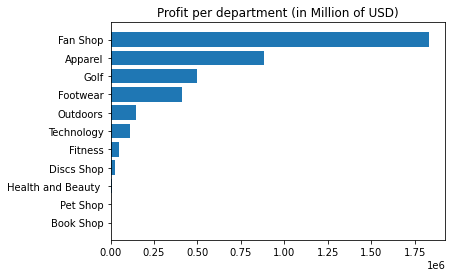

In [18]:
df_storeprof = df_storeprof.sort_values(by='Profit Per Department')
plt.barh(y=df_storeprof['Department Name'], width=df_storeprof['Profit Per Department'])
plt.title('Profit per department (in Million of USD)')

##### CONCLUSION:

a) Stores

* The company has 12.010 stores. Most of them are in the USA (7.967) and the rest in Puerto Rico (4.043).

* The states with the highest number of stores are: PR followed by CA (California) and NY (New York).

b) Departments

* The stores sell under 11 departments which include footwear, apparel, books, technology, fitness among others.

* The majority of orders are made in the Fan Shop, Apparel and Golf departments. Those three are also the departments with the highest profit in the company.
